# DIABETES DATASET
Using the above dataset to build a Model using Decision Tree and Random Forest Classifier to predict whether the individual is diabetic.

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Errors

## CONSTRAINTS
* Incorrect entry


## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | Number of times pregnant     | Number of times pregnant                                                 | Ratio    | Relevant      |
| 2        | Plasma glucose concentration | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Ratio    | Relevant      |
| 3        | Diastolic blood pressure     | Diastolic blood pressure (mm Hg)                                         | Ratio    | Relevant      |
| 4        | Triceps skin fold thickness  | Triceps skin fold thickness (mm)                                         | Ratio    | Relevant      |
| 5        | 2-Hour serum insulin         | 2-Hour serum insulin (mu U/ml)                                           | Ratio    | Relevant      |
| 6        | Body mass index              | Body mass index (weight in kg/(height in m)^2)                           | Ratio    | Relevant      |
| 7        | Diabetes pedigree function   | Diabetes pedigree function                                               | Ratio    | Relevant      |
| 8        | Age (years)                  | Age (years)                                                              | Ratio    | Relevant      |
| 9        | Class variable               | Dependent Variable                                                       | Binary   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass16\Diabetes.csv")
df=df0.copy()
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(768, 9)

In [4]:
df.dtypes

 Number of times pregnant          int64
 Plasma glucose concentration      int64
 Diastolic blood pressure          int64
 Triceps skin fold thickness       int64
 2-Hour serum insulin              int64
 Body mass index                 float64
 Diabetes pedigree function      float64
 Age (years)                       int64
 Class variable                   object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

  Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

  Number of times pregnant         17
 Plasma glucose concentration    136
 Diastolic blood pressure         47
 Triceps skin fold thickness      51
 2-Hour serum insulin            186
 Body mass index                 248
 Diabetes pedigree function      517
 Age (years)                      52
 Class variable                    2
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


 Number of times pregnant          3.845052
 Plasma glucose concentration    120.894531
 Diastolic blood pressure         69.105469
 Triceps skin fold thickness      20.536458
 2-Hour serum insulin             79.799479
 Body mass index                  31.992578
 Diabetes pedigree function        0.471876
 Age (years)                      33.240885
dtype: float64

In [11]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


 Number of times pregnant          3.0000
 Plasma glucose concentration    117.0000
 Diastolic blood pressure         72.0000
 Triceps skin fold thickness      23.0000
 2-Hour serum insulin             30.5000
 Body mass index                  32.0000
 Diabetes pedigree function        0.3725
 Age (years)                      29.0000
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([[1, 100, 70, 0, 0, 32.0, 0.254, 22, 'NO']], dtype=object), count=array([[135,  17,  57, 227, 374,  13,   6,  72, 500]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


 Number of times pregnant           11.354056
 Plasma glucose concentration     1022.248314
 Diastolic blood pressure          374.647271
 Triceps skin fold thickness       254.473245
 2-Hour serum insulin            13281.180078
 Body mass index                    62.159984
 Diabetes pedigree function          0.109779
 Age (years)                       138.303046
dtype: float64

In [14]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


 Number of times pregnant          3.369578
 Plasma glucose concentration     31.972618
 Diastolic blood pressure         19.355807
 Triceps skin fold thickness      15.952218
 2-Hour serum insulin            115.244002
 Body mass index                   7.884160
 Diabetes pedigree function        0.331329
 Age (years)                      11.760232
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


 Number of times pregnant        0.901674
 Plasma glucose concentration    0.173754
 Diastolic blood pressure       -1.843608
 Triceps skin fold thickness     0.109372
 2-Hour serum insulin            2.272251
 Body mass index                -0.428982
 Diabetes pedigree function      1.919911
 Age (years)                     1.129597
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


 Number of times pregnant        0.159220
 Plasma glucose concentration    0.640780
 Diastolic blood pressure        5.180157
 Triceps skin fold thickness    -0.520072
 2-Hour serum insulin            7.214260
 Body mass index                 3.290443
 Diabetes pedigree function      5.594954
 Age (years)                     0.643159
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_28368\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

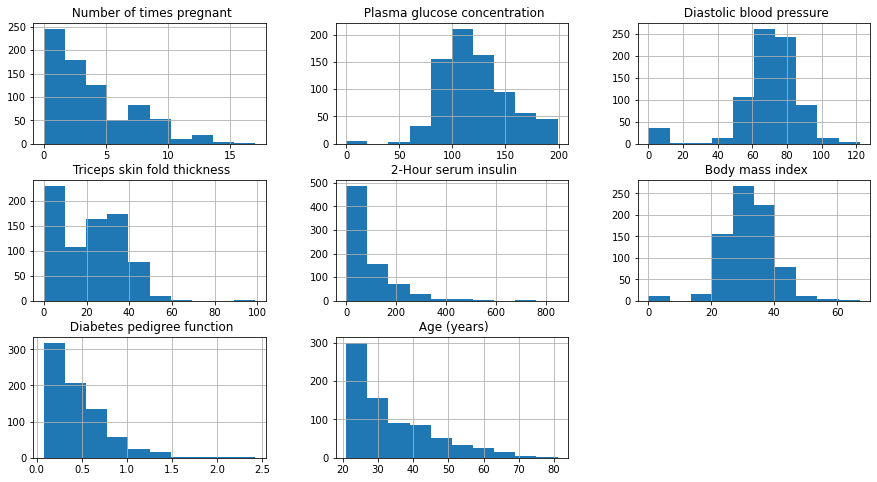

In [17]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


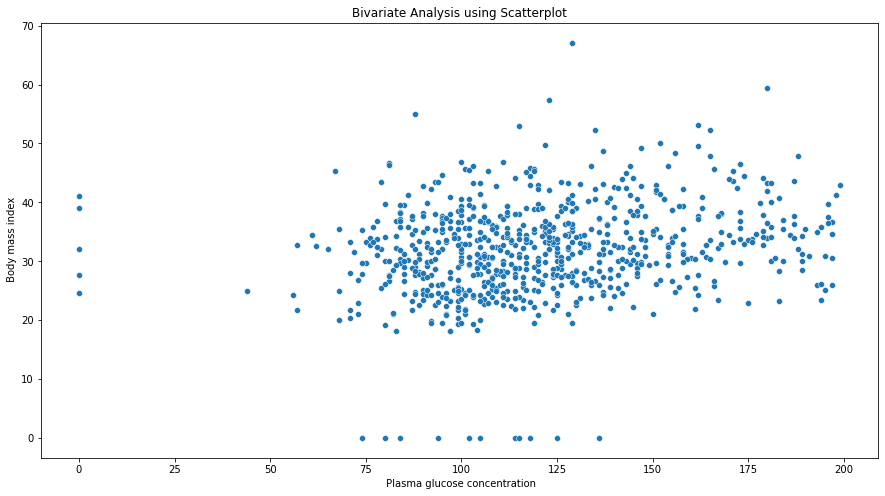

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(df[' Plasma glucose concentration'],df[' Body mass index'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [24]:
df.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Number of times pregnant'>

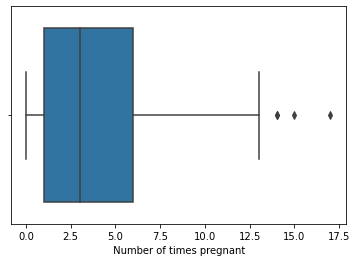

In [29]:
sns.boxplot(df[" Number of times pregnant"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Plasma glucose concentration'>

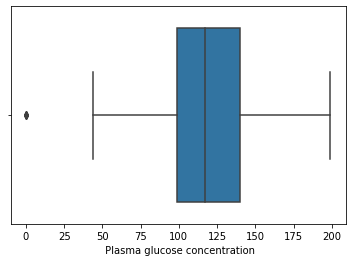

In [30]:
sns.boxplot(df[' Plasma glucose concentration'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Diastolic blood pressure'>

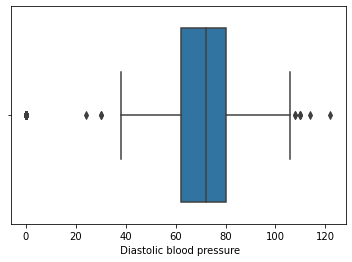

In [31]:
sns.boxplot(df[' Diastolic blood pressure'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Triceps skin fold thickness'>

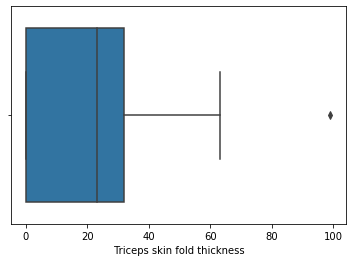

In [32]:
sns.boxplot(df[' Triceps skin fold thickness'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' 2-Hour serum insulin'>

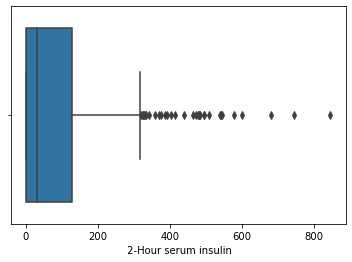

In [33]:
sns.boxplot(df[' 2-Hour serum insulin'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Body mass index'>

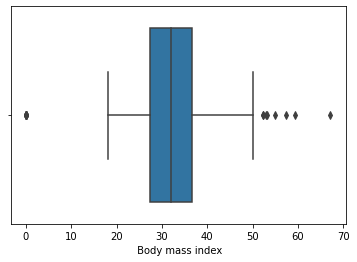

In [34]:
sns.boxplot(df[' Body mass index'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Age (years)'>

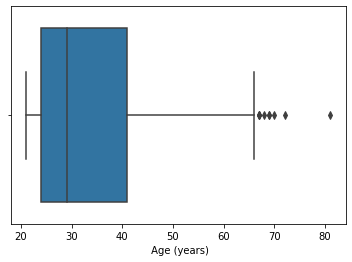

In [35]:
sns.boxplot(df[' Age (years)'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Diabetes pedigree function'>

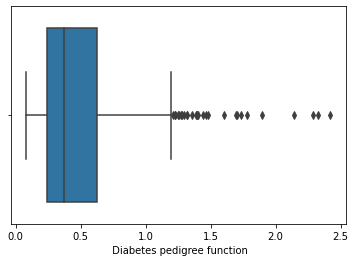

In [36]:
sns.boxplot(df[' Diabetes pedigree function'])

from the boxplots it is evident that there are many outliers so checking the number of outliers for each variable using the below custom function.

In [37]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [38]:
sum(outlier_func(df[" Number of times pregnant"]))

4

In [39]:
sum(outlier_func(df[' Plasma glucose concentration']))

5

In [40]:
sum(outlier_func(df[' Diastolic blood pressure']))

45

In [43]:
sum(outlier_func(df[' Triceps skin fold thickness']))

1

In [44]:
sum(outlier_func(df[' 2-Hour serum insulin']))

34

In [45]:
sum(outlier_func(df[' Body mass index']))

19

In [46]:
sum(outlier_func(df[' Age (years)']))

9

In [47]:
sum(outlier_func(df[' Diabetes pedigree function']))

29

Using the winsorization method to replace the outliers. 

In [49]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=[' Number of times pregnant'])
df[" Number of times pregnant"]=winsor.fit_transform(df[[' Number of times pregnant']])
sum(outlier_func(df[" Number of times pregnant"]))

0

In [50]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=[' Plasma glucose concentration'])

df[' Plasma glucose concentration']= winsor.fit_transform(df[[' Plasma glucose concentration']])
sum(outlier_func(df[' Plasma glucose concentration']))

0

In [51]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=[' Diastolic blood pressure'])
df[' Diastolic blood pressure']=winsor.fit_transform(df[[' Diastolic blood pressure']])
sum(outlier_func(df[' Diastolic blood pressure']))

0

In [52]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=[' Triceps skin fold thickness'])
df[' Triceps skin fold thickness']=winsor.fit_transform(df[[' Triceps skin fold thickness']])
sum(outlier_func(df[' Triceps skin fold thickness']))

0

In [53]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=[' 2-Hour serum insulin'])
df[' 2-Hour serum insulin']=winsor.fit_transform(df[[' 2-Hour serum insulin']])
sum(outlier_func(df[' 2-Hour serum insulin']))

0

In [54]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=[' Body mass index'])
df[' Body mass index']=winsor.fit_transform(df[[' Body mass index']])
sum(outlier_func(df[' Body mass index']))

0

In [55]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=[' Age (years)'])
df[' Age (years)']=winsor.fit_transform(df[[' Age (years)']])
sum(outlier_func(df[' Age (years)']))

0

In [56]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=[' Diabetes pedigree function'])
df[' Diabetes pedigree function']=winsor.fit_transform(df[[' Diabetes pedigree function']])
sum(outlier_func(df[' Diabetes pedigree function']))

0

### MODEL BUILDING

Splitting the data in to dependent and independent variable.

In [57]:
X=df.drop([' Class variable'],axis=1)
Y=df[' Class variable']

Splitting the X and Y data into train and test dataset using train_test_split function.

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Assigning the column names to cols.

In [59]:
cols=X.columns

Scaling the train and test data of the independent variables.

In [60]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [61]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,0.8,0.773810,0.333333,0.183206,0.684615,0.301887,0.876526,1.470588
1,0.2,-0.488095,-0.666667,0.000000,-0.284615,-0.452830,0.200814,-0.411765
2,-0.6,1.130952,1.000000,0.305344,2.162500,1.956873,0.157395,-0.352941
3,-0.4,-0.202381,-0.888889,-0.061069,0.753846,-0.776280,1.259159,-0.352941
4,1.0,0.059524,-2.055556,-0.702290,-0.284615,-0.258760,-0.504749,0.529412


In [62]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,-0.50,2.268456,0.322581,0.65625,0.000000,1.282192,1.983010,-0.428571
1,-0.25,-0.201342,0.193548,0.25000,0.869565,0.263014,0.050971,-0.357143
2,0.25,-1.033557,-0.580645,-0.68750,0.000000,0.306849,0.019417,-0.214286
3,0.50,1.382550,0.064516,-0.09375,1.521739,-0.591781,0.495146,1.642857
4,-0.75,-0.093960,-0.387097,-0.68750,0.000000,-0.723288,0.672330,0.214286


Creating a Decision Tree classifier object with criterion as entropy

In [63]:
model = DT(criterion='entropy',random_state=0) 

Training the classifier on the train data. 

In [64]:
model.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluating the test data

In [65]:
preds = model.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [66]:
accuracy_score(Y_test, preds)

0.7077922077922078

In [67]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,NO,YES
Actual,,
NO,74,33
YES,12,35


Evaluating the train data

In [68]:
preds1=model.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the train data. 

In [69]:
accuracy_score(Y_train,preds1)

1.0

In [70]:
pd.crosstab(Y_train,preds1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,NO,YES
Actual,,
NO,393,0
YES,0,221


### HYPERPARAMETER TUNING OF DECISION TREE CLASSIFIER

Loading the gridsearchcv function from sklearn library. 

In [71]:
from sklearn.model_selection import GridSearchCV

Declaring the parameters

In [72]:
param_grid = {'min_samples_leaf': [1, 5, 10, 20],
              'max_depth': [2, 4, 6, 8, 10],
              'max_features': ['sqrt']}

Creating a GridSearchCV object. 

In [73]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                                scoring = 'accuracy', n_jobs = -1, cv = 8, 
                                refit=True, return_train_score=True)

Training the GridSearchCV on train data. 

In [74]:
grid_search.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=8,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

The best parameters for the classifier.

In [75]:
best_parameters=grid_search.best_params_
best_parameters

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1}

Creating the estimator based on the best parameters. 

In [76]:
cv_dt_clf_grid = grid_search.best_estimator_

Evaluating the test data. 

In [77]:
accuracy_score(Y_test, cv_dt_clf_grid.predict(X_test))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.6948051948051948

In [78]:
pd.crosstab(Y_test, cv_dt_clf_grid.predict(X_test), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,NO,YES
Actual,,
NO,79,28
YES,19,28


Evaluating the train data. 

In [79]:
accuracy_score(Y_train, cv_dt_clf_grid.predict(X_train))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8664495114006515

In [80]:
pd.crosstab(Y_train, cv_dt_clf_grid.predict(X_train), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,NO,YES
Actual,,
NO,328,65
YES,17,204


### RANDOM FOREST CLASSIFIER
Loading the Random forest classifier from sklearn library. 

In [81]:
from sklearn.ensemble import RandomForestClassifier

Creating the classifier object

In [82]:
rf_classifier=RandomForestClassifier(n_estimators=100)

Training the classifier on the train data. 

In [83]:
rf_classifier.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

Evaluating the test data

In [84]:
preds_rf =rf_classifier.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [85]:
accuracy_score(Y_test,preds_rf)

0.7857142857142857

In [86]:
pd.crosstab(Y_test,preds_rf, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,NO,YES
Actual,,
NO,91,16
YES,17,30


Evaluating the train data

In [87]:
preds_rf1=rf_classifier.predict(X_train)
accuracy_score(Y_train,preds_rf1)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [88]:
pd.crosstab(Y_train,preds_rf1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,NO,YES
Actual,,
NO,393,0
YES,0,221


### HYPERPARAMETER TUNING OF RANDOMFOREST CLASSIFIER
Creating the gridsearchcv object

In [89]:
grid_search_rf = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, 
                                scoring = 'accuracy', n_jobs = -1, cv = 4, 
                                refit=True, return_train_score=True)

Training the gridsearch object on the train data. 

In [90]:
grid_search_rf.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

Considering the estimator based on the best parameters. 

In [91]:
cv_dt_clf_grid_rf = grid_search_rf.best_estimator_

Evaluating the test data

In [92]:
accuracy_score(Y_test, cv_dt_clf_grid_rf.predict(X_test))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8051948051948052

In [93]:
pd.crosstab(Y_test, cv_dt_clf_grid_rf.predict(X_test), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,NO,YES
Actual,,
NO,94,13
YES,17,30


Evaluating the train data. 

In [94]:
accuracy_score(Y_train, cv_dt_clf_grid_rf.predict(X_train))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.8013029315960912

In [95]:
pd.crosstab(Y_train, cv_dt_clf_grid_rf.predict(X_train), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,NO,YES
Actual,,
NO,359,34
YES,88,133


### CONCLUSIONS

The Random Forest model after hyperparameter tuning is giving the best results as the accuracies are slightly above 80% and it is not overfitting which was in the case of other models. 